<a href="https://colab.research.google.com/github/dishankkalra23/Explore-Weather-Trends/blob/main/Explore_Weather_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
city_data = pd.read_csv("/content/drive/MyDrive/Explore Weather Trends/city_data.csv")
city_data.shape

(70792, 4)

# List of Cities in India

In [41]:
Indian_cities = city_data[city_data['country']=='India']['city'].unique()
Indian_cities

array(['Agra', 'Ahmadabad', 'Allahabad', 'Amritsar', 'Bangalore',
       'Bhopal', 'Delhi', 'Haora', 'Hyderabad', 'Indore', 'Jaipur',
       'Kanpur', 'Ludhiana', 'Nagpur', 'New Delhi', 'Patna', 'Pune',
       'Rajkot', 'Ranchi', 'Surat', 'Vadodara', 'Varanasi'], dtype=object)

## Number of Indian Cities

In [42]:
len(Indian_cities)

22

# Indian city choosen: Hyderabad



## Number of rows in Hyderabad's data
Note - There are two cities with name as Hyderabad, one in India and other in Pakistan 

In [43]:
data_hyderabad = city_data[(city_data['country']=='India') & (city_data['city']=='Hyderabad')]
data_hyderabad.shape[0]

218

# Handling Missing values

In [56]:
data_hyderabad

,year,city,country,avg_temp
26146,1796,Hyderabad,India,26.53
26147,1797,Hyderabad,India,27.48
26148,1798,Hyderabad,India,26.20
26149,1799,Hyderabad,India,26.84
26150,1800,Hyderabad,India,26.88
...,...,...,...,...
26359,2009,Hyderabad,India,28.03
26360,2010,Hyderabad,India,27.69
26361,2011,Hyderabad,India,27.41
26362,2012,Hyderabad,India,28.02


## Note: Only column-4(avg_temp) has null values

In [64]:
data_hyderabad.isnull().sum()

year        0
city        0
country     0
avg_temp    7
dtype: int64

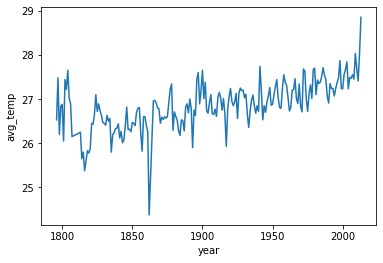

In [67]:
x_data = data_hyderabad['year']
y_data = data_hyderabad['avg_temp']

sns.lineplot(x=x_data,y=y_data,data=data_hyderabad)

## Filling missing values with mean value of column(avg_temp)

In [57]:
mean_val = data_hyderabad['avg_temp'].mean(axis=0,skipna=True)
mean_val

26.861563981042668

In [60]:
data_hyderabad_with_mean = data_hyderabad.fillna(mean_val)

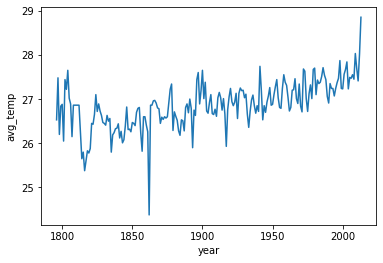

In [66]:
x_data_2 = data_hyderabad_with_mean['year']
y_data_2 = data_hyderabad_with_mean['avg_temp']

sns.lineplot(x=x_data_2,y=y_data_2,data=data_hyderabad_with_mean)

## Filling missing values with interpolation method

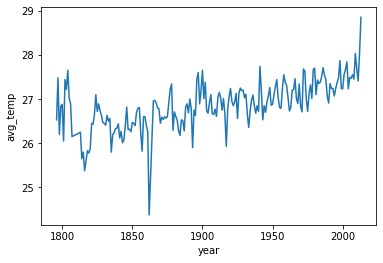

In [68]:
sns.lineplot(x=x_data,y=y_data,data=data_hyderabad.interpolate())

## TODO: Finding Moving averages
